In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data2.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [3]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression()
model.fit(X,y)


#Your code:


#Hint: .fit()

LinearRegression()

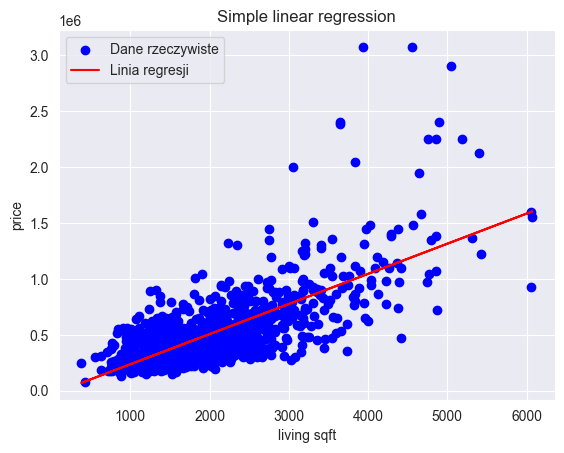

In [4]:
#b)
plt.scatter(X, y, color='blue', label='Dane rzeczywiste')  # Punkty danych
plt.plot(X, model.predict(X), color='red', label='Linia regresji')  # Linia regresji

# Tytuł i etykiety osi
plt.title('Simple linear regression')
plt.xlabel('living sqft')
plt.ylabel('price')
plt.legend()

# Wyświetlenie wykresu
plt.show()
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

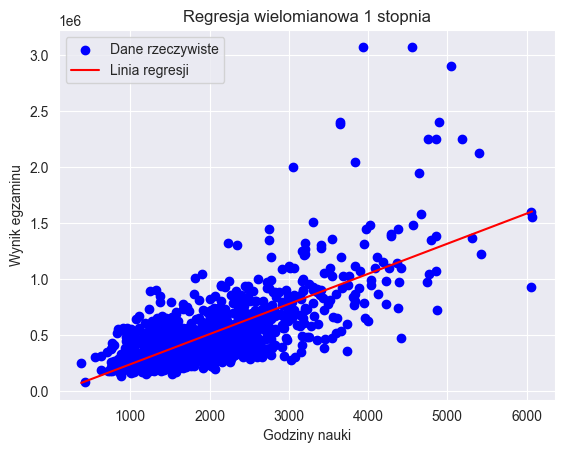

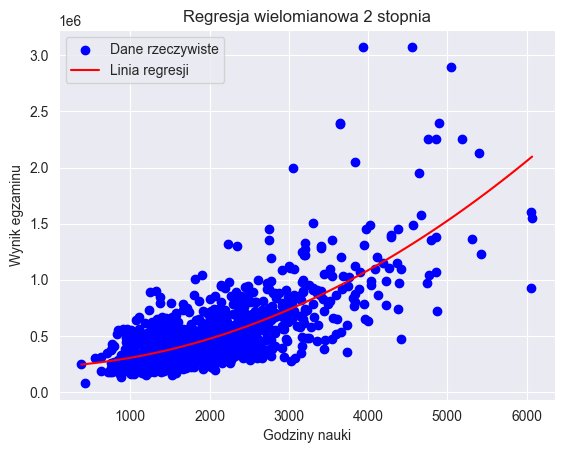

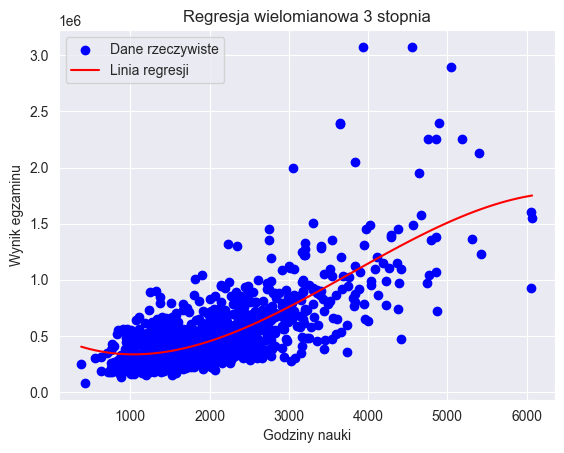

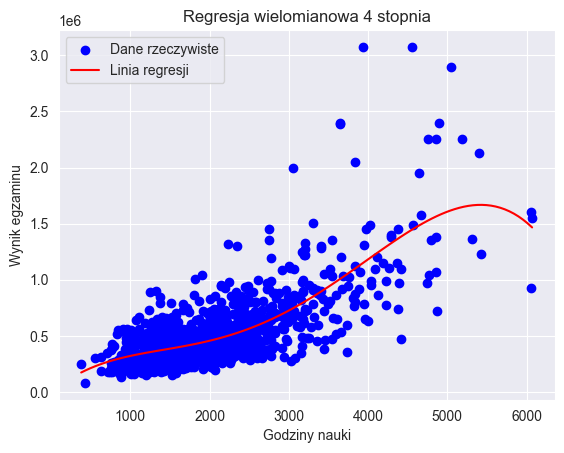

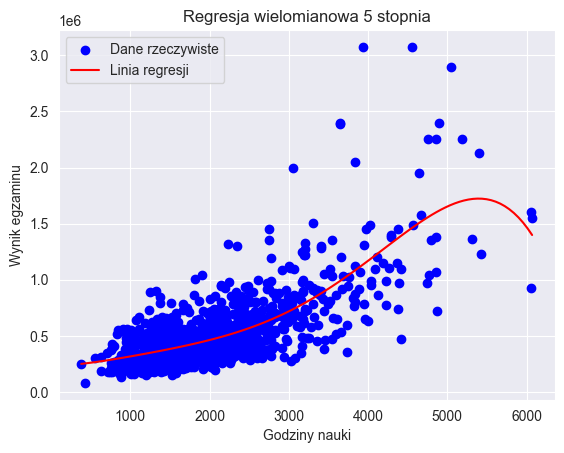

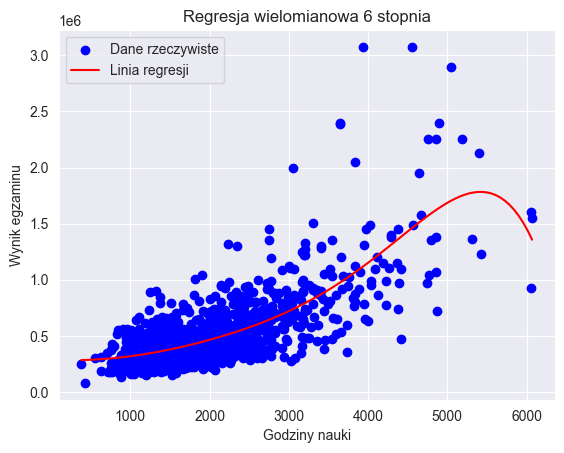

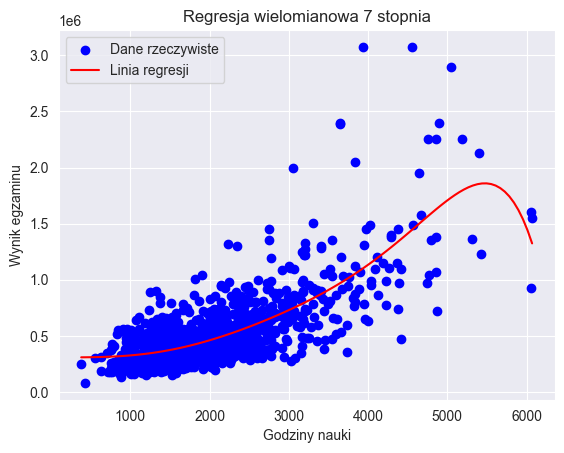

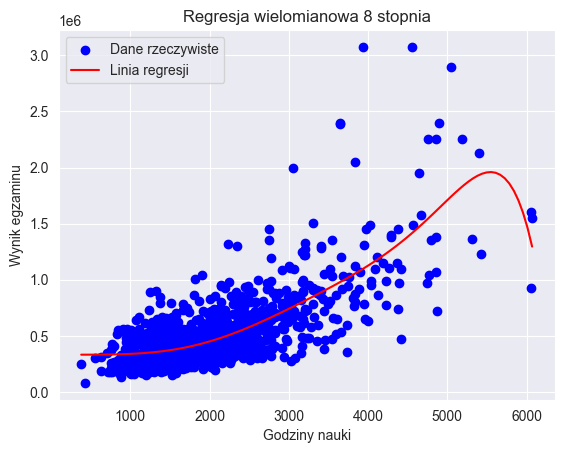

In [5]:
#c)

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    model=LinearRegression()
    model.fit(X_order, y)
    plt.scatter(X, y, color='blue', label='Dane rzeczywiste')#dane ktore w kazdym wykresie te same

    X_pred = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # linspace tworzy 100 pkt rownomiernie rozmieszczonych pomiwdzy min(X) a max(X)
                                                              # po to aby regresja liniowa wyzszego stopnia miala wiecej pkt aby te funkcje byly bardziej gladkie i sie nie bugowaly
    
    X_pred_order = poly.transform(X_pred)  # potrzebujemy tego aby przeksztalcic danych na cechy wielomianowe: np. [x1, x2, x3] zmieniamy na [1,x1,x1^2,x2,x2^2,x3,x3^2]

    plt.plot(X_pred, model.predict(X_pred_order), color='red', label='Linia regresji')  # Linia regresji ktora sie zmienia w zaleznosci od stopnia wielomianu
    plt.title(f'Regresja wielomianowa {order} stopnia')
    plt.xlabel('Godziny nauki')
    plt.ylabel('Wynik egzaminu')
    plt.legend()
    plt.show()
    
    
    #Your code:


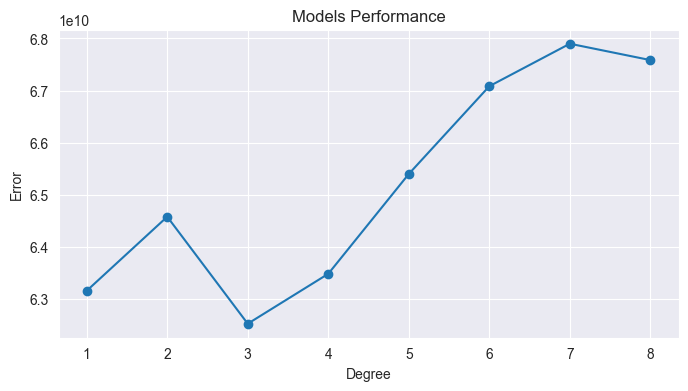

In [6]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

degrees = [1,2,3,4,5,6,7,8]
errors = []
for degree in degrees:
  poly = PolynomialFeatures(degree)#tworzymy obiekt w ktorym okreslamy stopien wielomianu
  X_train_poly = poly.fit_transform(X_train)#przeksztalcenie danych x treningowych
                                            # na cechy wielomianowe
  X_test_poly = poly.transform(X_test)#przeksztalcamy dane x treningowych do cech wielomianowych
  model = LinearRegression() #tworzymy model regresji liniowej
  model.fit(X_train_poly, y_train)# dopasowywujemy model do danych tutaj trenigowych
  y_pred = model.predict(X_test_poly) # robimy predykcje na danych testowych
  error = mean_squared_error(y_test, y_pred)#sprawdzamy blad predykcji z rzeczywistymi danymi
                                            #na podstawie bledy sredniokwadratowego MSE
  errors.append(error)
plt.figure(figsize=(8, 4))
plt.plot(degrees, errors, marker='o')
plt.title('Models Performance')
plt.xlabel('Degree')
#plt.ylim(0,58000000000)
plt.ylabel('Error')
plt.grid(True)
plt.show()



## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

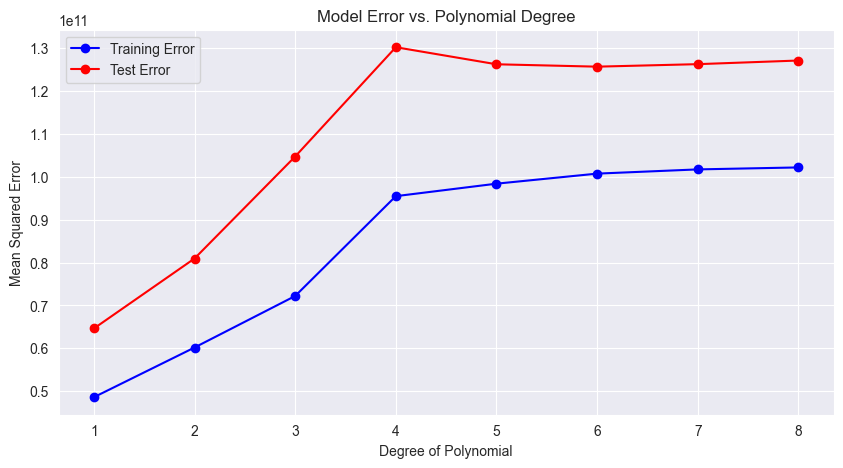

In [10]:
train_errors = []
test_errors = []
for degree in range(1,9):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    train_errors.append(train_error)
    test_errors.append(test_error)

# Wykres błędu testowego i treningowego dla różnych stopni wielomianu
plt.figure(figsize=(10, 5))
plt.plot(degrees, train_errors, label='Training Error', marker='o', color='blue')
plt.plot(degrees, test_errors, label='Test Error', marker='o', color='red')
plt.title('Model Error vs. Polynomial Degree')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()
    


## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Text(0, 0.5, 'living sqft')

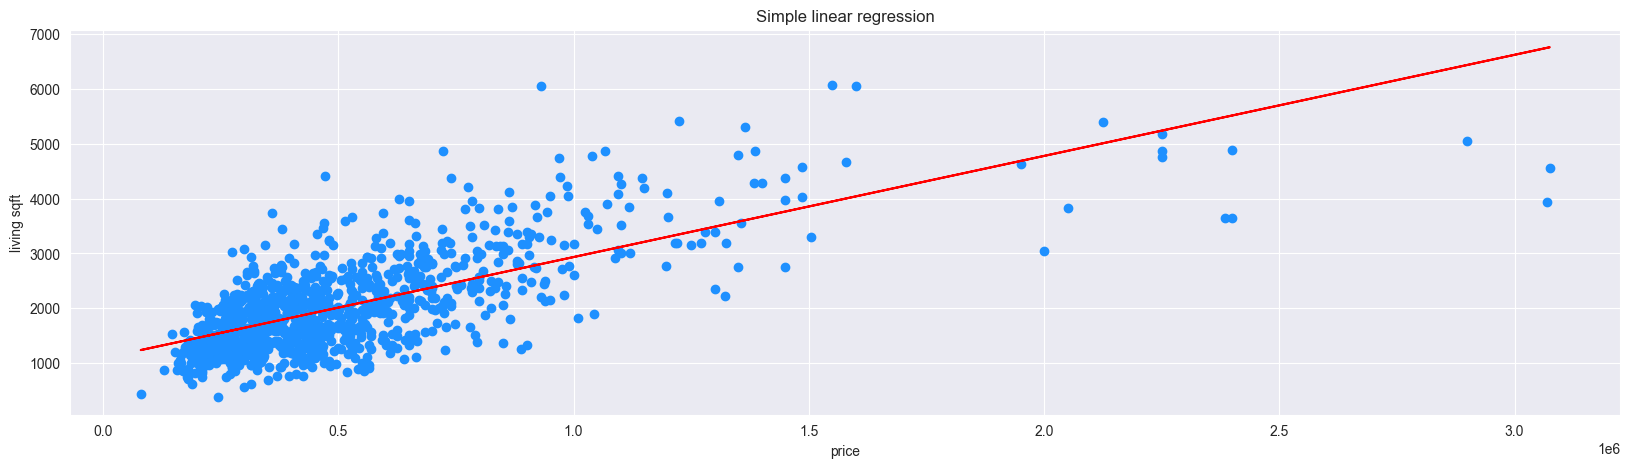

In [32]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]
model = LinearRegression()
model.fit(X, y)


# Tytuł i etykiety osi
plt.figure(figsize=(20, 5))
plt.scatter(X, y, color='dodgerblue', label='Dane rzeczywiste')  # Punkty danych
plt.plot(X, model.predict(X), color='red', label='Linia regresji')  # Linia regresji
plt.title('Simple linear regression')
plt.xlabel('price')
plt.ylabel('living sqft')



Mean squared error equals: 48749229778.7155


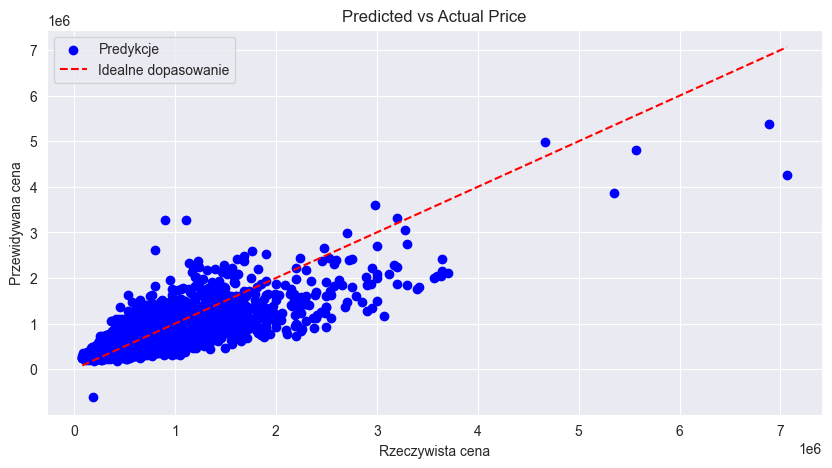

'\nDane testowe (y_test): To rzeczywiste wartości cen, które nie były używane w trakcie trenowania modelu. Ich główną rolą jest dostarczenie obiektywnej miary skuteczności modelu.\n\nPrzewidywane wartości (y_pred): To wartości, które model generuje na podstawie danych testowych. Odpowiadają one temu, co model myśli, że ceny powinny być, bazując na danych, które były mu dostarczone\n\n#Your model:\n'

In [39]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)
'''
 tym kodzie model regresji liniowej jest trenowany na rzeczywistych danych,
  a następnie używany do przewidywania wyników na podstawie tych samych danych testowych.
'''
y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, color='blue', label='Predykcje')  # Porównanie rzeczywiste vs przewidywane
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Idealne dopasowanie')
plt.title('Predicted vs Actual Price')
plt.xlabel('Rzeczywista cena')
plt.ylabel('Przewidywana cena')
plt.legend()
plt.grid(True)
plt.show()
'''
Dane testowe (y_test): To rzeczywiste wartości cen, które nie były używane w trakcie trenowania modelu. Ich główną rolą jest dostarczenie obiektywnej miary skuteczności modelu.

Przewidywane wartości (y_pred): To wartości, które model generuje na podstawie danych testowych. Odpowiadają one temu, co model myśli, że ceny powinny być, bazując na danych, które były mu dostarczone

y_test: Jest to część danych, która zawiera wartości, które model
 ma przewidzieć, ale które nie były używane podczas trenowania modelu. 
 Zbiór testowy jest używany do oceny i weryfikacji wydajności modelu po 
 jego przeszkoleniu na danych treningowych (y_train).
 
 y_train zawiera rzeczywiste, znane wartości, które model stara się przewidzieć 
 na podstawie cech dostarczonych w X_train.

'''